In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
import os

# Load the meme scores
CHECKPOINT_PATH = '/scratch/datasets/mog29/unarXive_ngrams'
meme_score_path = os.path.join(CHECKPOINT_PATH, 'meme_scores.pkl')
with open(meme_score_path, 'rb') as f:
    meme_scores = pickle.load(f)

In [3]:
meme_scores.keys()

dict_keys(['91', '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'overall'])

In [4]:
def get_top_memes(meme_scores, key, k):
    meme_score_pairs = []
    for meme, meme_info in meme_scores[key].items():
        if meme == "num_papers":
            continue
        if len(meme.split()) < 2:
            continue

        meme_score_pairs.append((meme, meme_info['score'], meme_info['frequency']))
    
    sorted_meme_scores = sorted(meme_score_pairs, key=lambda x:x[1], reverse=True)

    

    return sorted_meme_scores[:k]

In [5]:
get_top_memes(meme_scores, 'overall', 400)

[('of the', 0.2656817423418335, 58309),
 ('in the', 0.1222796267895994, 26844),
 ('on the', 0.07858084936087212, 17252),
 ('to the', 0.07072698837808075, 15533),
 ('can be', 0.04626624521829245, 10170),
 ('neural networks', 0.042881958741411555, 9418),
 ('based on', 0.0365499885801128, 8037),
 ('for the', 0.0346050539431011, 7617),
 ('and the', 0.03423422270323489, 7534),
 ('show that', 0.031212754256506468, 6870),
 ('the proposed', 0.030292257471025028, 6662),
 ('in this', 0.029090635186587024, 6410),
 ('that the', 0.02782703559905944, 6131),
 ('such as', 0.027809635228683443, 6129),
 ('of a', 0.027636678590908372, 6087),
 ('in a', 0.02687582130320879, 5925),
 ('we propose', 0.024162174487871047, 5317),
 ('machine learning', 0.022928733877085165, 5051),
 ('deep learning', 0.022813892974173643, 5024),
 ('with the', 0.022274168496650384, 4919),
 ('as a', 0.02084287013889569, 4604),
 ('neural network', 0.02066544269794302, 4556),
 ('number of', 0.020656902596258422, 4552),
 ('from the', 

In [6]:
ranking = [
    ('neural networks', 0.042881958741411555, 9418),
    ('machine learning', 0.022928733877085165, 5051),
    ('deep learning', 0.022813892974173643, 5024),
    ('reinforcement learning', 0.019341695006101414, 4254),
    ('object detection', 0.009620895455684784, 2115),
    ('training data', 0.008244875856935743, 1831),
    ('semantic segmentation', 0.006625811165921627, 1458),
    ('language models', 0.006575605952895831, 1468),
    ('time series', 0.006357475525213401, 1407),
    ('deep neural networks', 0.006173816949263472, 1371),
    ('domain adaptation', 0.0059815703957484005, 1317),
    ('representation learning', 0.005563245727941471, 1230),
    ('federated learning', 0.005484448933507892, 1209),
    ('natural language', 0.005413217867967144, 1201),
    ('machine translation', 0.005041099629314968, 1116),
    ('transfer learning', 0.0046936338925574065, 1046),
    ('pose estimation', 0.004538140794895469, 1000),
    ('question answering', 0.00424674226933871, 939),
    ('point clouds', 0.004162658330767039, 918),
    ('anomaly detection', 0.004158603767527434, 920),
    ('adversarial examples', 0.004102161327106172, 905),
    ('convolutional neural networks', 0.004041642905316553, 913),
    ('gradient descent', 0.003961634076091543, 881),
    ('data augmentation', 0.003960715899299253, 882),
    ('image classification', 0.003913077134491253, 870),
    ('speech recognition', 0.0037561421462553417, 829),
    ('contrastive learning', 0.003657206774089669, 811),
    ('generative models', 0.003614870028169093, 812),
    ('image segmentation', 0.003508965445745754, 775),
    ('latent space', 0.003465017765309446, 775),
    ('adversarial attacks', 0.0034200239302203915, 759),
    ('action recognition', 0.003294094703805154, 727),
    ('social media', 0.0032773981386725413, 739),
    ('target domain', 0.0032678257865549386, 724),
    ('loss function', 0.0032599871283088867, 744),
    ('active learning', 0.0031215428362308664, 693),
    ('learning algorithms', 0.002956407819064584, 693),
    ('computer vision', 0.0029238966613230185, 668),
    ('data sets', 0.002911477415650462, 705),
    ('adversarial networks', 0.002816382387126144, 624),
    ('deep reinforcement learning', 0.002799111277512631, 628),
    ('adversarial training', 0.0027792571423589894, 620),
    ('graph neural networks', 0.0027349752695151304, 609),
    ('face recognition', 0.002586989154956621, 572),
    ('word embeddings', 0.002333557109708986, 547),
    ('knowledge distillation', 0.00232903762843064, 518),
    ('unlabeled data', 0.002299463408777921, 518),
    ('convolutional networks', 0.0022016550919596797, 493),
    ('autonomous driving', 0.0021833956021405417, 485),
    ('feature selection', 0.0021000042531731707, 474),
]
len(ranking)

50

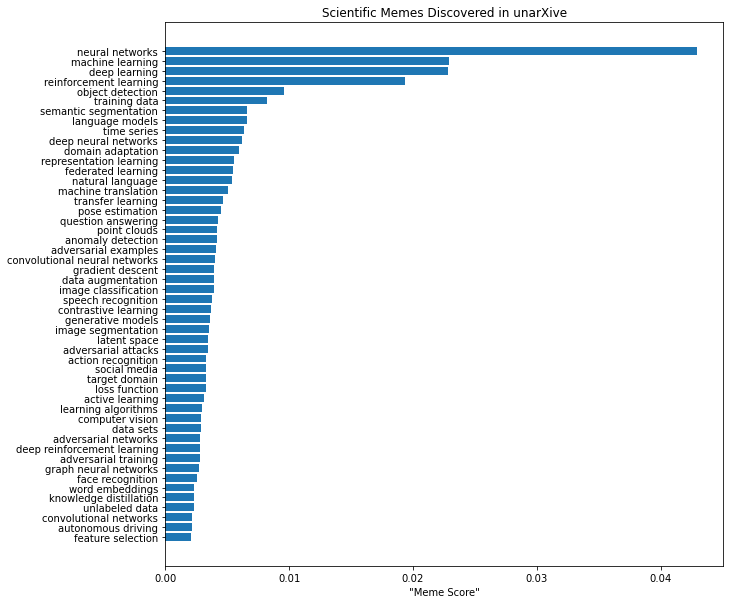

In [21]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))
y_pos = np.arange(len(ranking))
values = [rank[1] for rank in ranking]
hbars = ax.barh(y_pos, values)
ax.set_yticks(y_pos)
ax.set_yticklabels([rank[0] for rank in ranking])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('"Meme Score"')
ax.set_title('Scientific Memes Discovered in unarXive')


plt.show()
